# ☀️ Renewable Power Generation Prediction - EDA

## Problem Statement
How weather directly impacts renewable energy generation. That's why we'll approach this problem as a regression problem but not as a time series problem.

In this notebook we'll focus on getting know the dataset.

# 📚 1. Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import warnings
warnings.simplefilter(action="ignore", category=Warning) # Ignore warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')

# 📖 2. Load Data

In [2]:
raw_data = pd.read_csv('./Data/Raw/Renewable.csv')
print(f'The dataset has {raw_data.shape[0]} rows and {raw_data.shape[1]} columns')

The dataset has 196776 rows and 17 columns


In [3]:
# Creating a copy of the dataframe in case we need the raw data in the next sections
df = raw_data.copy()

## 2.1. Data Overview

In [4]:
df.head()

Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
0  2017-01-01 00:00:00                 0 0.000 1.600      1021       100   
1  2017-01-01 00:15:00                 0 0.000 1.600      1021       100   
2  2017-01-01 00:30:00                 0 0.000 1.600      1021       100   
3  2017-01-01 00:45:00                 0 0.000 1.600      1021       100   
4  2017-01-01 01:00:00                 0 0.000 1.700      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0       4.900    0.000    0.000         100      0             0        450   
1       4.900    0.000    0.000         100      0             0        450   
2       4.900    0.000    0.000         100      0             0        450   
3       4.900    0.000    0.000         100      0             0        450   
4       5.200    0.000    0.000         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                   0.000             4     0      1  
1                   0.000             4     0      1  
2                   0.000             4     0      1  
3                   0.000             4     0      1  
4                   0.000             4     1      1

In [5]:
df.tail()

Time  Energy delta[Wh]    GHI   temp  pressure  \
196771  2022-08-31 16:45:00               118 23.700 18.600      1023   
196772  2022-08-31 17:00:00                82 15.600 18.500      1023   
196773  2022-08-31 17:15:00                51  8.000 18.500      1023   
196774  2022-08-31 17:30:00                24  2.100 18.500      1023   
196775  2022-08-31 17:45:00                 0  0.000 18.500      1023   

        humidity  wind_speed  rain_1h  snow_1h  clouds_all  isSun  \
196771        57       3.800    0.000    0.000          52      1   
196772        61       4.200    0.000    0.000          60      1   
196773        61       4.200    0.000    0.000          60      1   
196774        61       4.200    0.000    0.000          60      1   
196775        61       4.200    0.000    0.000          60      0   

        sunlightTime  dayLength  SunlightTime/daylength  weather_type  hour  \
196771           780        825                   0.950             3    16   
196772           795        825                   0.960             3    17   
196773           810        825                   0.980             3    17   
196774           825        825                   1.000             3    17   
196775             0        825                   0.000             3    17   

        month  
196771      8  
196772      8  
196773      8  
196774      8  
196775      8

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

🔎 **Observations:**

# ✅ 3. Sanity Check

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1. Checking for Missing Values

In [10]:
count = df.isnull().sum()[df.isnull().sum() > 0]
percentage = (count / df.shape[0]) * 100

print(count.shape[0], 'columns has missing values')
print('-'*50)
print(pd.DataFrame({'Count':count, 'Percentage %':percentage}))

0 columns has missing values
--------------------------------------------------
Empty DataFrame
Columns: [Count, Percentage %]
Index: []


In [8]:
# Checking some random records to see if there is any value which could replace null and may be missed by the above function.
df.sample(20, random_state=101)

Time  Energy delta[Wh]     GHI   temp  pressure  \
7204    2017-03-22 01:00:00                 0   0.000  2.900      1014   
165767  2021-09-29 17:45:00                 0   0.000 12.200      1017   
65423   2018-11-18 11:45:00                65  14.300  3.300      1031   
46618   2018-05-06 14:30:00              2269 139.800 19.800      1027   
116994  2020-05-09 16:30:00               435  52.600 18.300      1014   
164243  2021-09-13 20:45:00                 0   0.000 13.900      1019   
194491  2022-08-07 22:45:00                 0   0.000 14.900      1024   
7887    2017-03-29 03:45:00                 0   0.000  2.200      1017   
169981  2021-11-14 15:15:00                 0   0.000  6.500      1027   
61838   2018-10-12 03:30:00                 0   0.000 13.200      1021   
90581   2019-08-08 13:15:00              2070 101.100 21.900      1009   
67477   2018-12-09 21:15:00                 0   0.000  5.700       994   
456     2017-01-10 18:00:00                 0   0.000 -5.400      1016   
155158  2021-06-11 05:30:00               533  52.800 16.200      1018   
131567  2020-10-08 11:45:00              1089  58.300 13.500      1016   
92092   2019-08-24 07:00:00              1422 102.400 21.000      1026   
87129   2019-07-03 14:15:00              1296 117.100 16.800      1021   
30412   2017-11-18 19:00:00                 0   0.000  3.100      1006   
152246  2021-05-11 21:30:00                 0   0.000 22.700      1003   
62604   2018-10-20 03:00:00                 0   0.000  3.500      1026   

        humidity  wind_speed  rain_1h  snow_1h  clouds_all  isSun  \
7204          86       2.600    0.000    0.000         100      0   
165767        84       4.900    1.000    0.000          99      0   
65423         94       1.800    0.000    0.000         100      1   
46618         51       3.100    0.000    0.000           0      1   
116994        50       2.000    0.000    0.000          13      1   
164243        90       1.300    0.000    0.000         100      0   
194491        76       2.600    0.000    0.000          69      0   
7887          80       3.800    0.000    0.000           0      0   
169981        82       2.800    0.000    0.000         100      0   
61838         84       4.800    0.000    0.000           0      0   
90581         56       4.400    0.130    0.000          69      1   
67477         89       7.200    0.290    0.000          97      0   
456           82       4.700    0.000    0.000           0      0   
155158        84       1.800    0.000    0.000          32      1   
131567        72       5.300    0.000    0.000         100      1   
92092         68       1.500    0.000    0.000           0      1   
87129         54       6.300    0.000    0.000          59      1   
30412         90       6.000    0.000    0.000          58      0   
152246        60       5.600    0.000    0.000           7      0   
62604         94       2.300    0.000    0.000         100      0   

        sunlightTime  dayLength  SunlightTime/daylength  weather_type  hour  \
7204               0        735                   0.000             4     1   
165767             0        705                   0.000             5    17   
65423            330        510                   0.650             4    11   
46618            690        930                   0.740             1    14   
116994           810        930                   0.870             2    16   
164243             0        765                   0.000             4    20   
194491             0        915                   0.000             3    22   
7887               0        765                   0.000             1     3   
169981             0        510                   0.000             4    15   
61838              0        660                   0.000             1     3   
90581            600        915                   0.660             5    13   
67477              0        465                   0.000             5 

🔎 **Observations:** Seems there are no missing value from the dataset.

## 3.2. Checking for Duplicates

In [9]:
df.duplicated().sum()

0

🔎 **Observations:** There are no duplicate records.

## 3.3. Checking for Data Type

In [11]:
df.dtypes

Time                       object
Energy delta[Wh]            int64
GHI                       float64
temp                      float64
pressure                    int64
humidity                    int64
wind_speed                float64
rain_1h                   float64
snow_1h                   float64
clouds_all                  int64
isSun                       int64
sunlightTime                int64
dayLength                   int64
SunlightTime/daylength    float64
weather_type                int64
hour                        int64
month                       int64
dtype: object

## 3.4. Checking the number of unique values of each column

In [12]:
df.nunique()

Time                      196776
Energy delta[Wh]            4556
GHI                         2277
temp                         503
pressure                      71
humidity                      79
wind_speed                   136
rain_1h                      311
snow_1h                      129
clouds_all                   101
isSun                          2
sunlightTime                  69
dayLength                     39
SunlightTime/daylength       101
weather_type                   5
hour                          24
month                         12
dtype: int64

🔎 **Observations:**

- isSun, weather_type, month and hour should be converted into object columns

## 3.5. Summary Statistics

In [13]:
df.describe().T

count     mean      std     min      25%      50%  \
Energy delta[Wh]       196776.000  573.008 1044.824   0.000    0.000    0.000   
GHI                    196776.000   32.597   52.172   0.000    0.000    1.600   
temp                   196776.000    9.791    7.995 -16.600    3.600    9.300   
pressure               196776.000 1015.293    9.586 977.000 1010.000 1016.000   
humidity               196776.000   79.811   15.604  22.000   70.000   84.000   
wind_speed             196776.000    3.938    1.822   0.000    2.600    3.700   
rain_1h                196776.000    0.066    0.279   0.000    0.000    0.000   
snow_1h                196776.000    0.007    0.070   0.000    0.000    0.000   
clouds_all             196776.000   65.974   36.629   0.000   34.000   82.000   
isSun                  196776.000    0.520    0.500   0.000    0.000    1.000   
sunlightTime           196776.000  211.721  273.902   0.000    0.000   30.000   
dayLength              196776.000  748.644  194.870 450.000  570.000  765.000   
SunlightTime/daylength 196776.000    0.265    0.329   0.000    0.000    0.050   
weather_type           196776.000    3.198    1.290   1.000    2.000    4.000   
hour                   196776.000   11.499    6.922   0.000    5.000   11.000   
month                  196776.000    6.298    3.376   1.000    3.000    6.000   

                            75%      max  
Energy delta[Wh]        577.000 5020.000  
GHI                      46.800  229.200  
temp                     15.700   35.800  
pressure               1021.000 1047.000  
humidity                 92.000  100.000  
wind_speed                5.000   14.300  
rain_1h                   0.000    8.090  
snow_1h                   0.000    2.820  
clouds_all              100.000  100.000  
isSun                     1.000    1.000  
sunlightTime            390.000 1020.000  
dayLength               930.000 1020.000  
SunlightTime/daylength    0.530    1.000  
weather_type              4.000    5.000  
hour                     17.000   23.000  
month                     9.000   12.000

In [14]:
print("From Time : ",df['Time'].min())
print("To Time   : ",df['Time'].max())

From Time :  2017-01-01 00:00:00
To Time   :  2022-08-31 17:45:00


# 📊 4. Exploratory Data Analysis (EDA) and Visualization

In [15]:
target = 'Energy_Delta'
df = df.rename(columns={'Energy delta[Wh]': target})

✍🏼 **Note:** Since we are going to predict the power generation, it's not relevant for us to keep the conditions where the amount power generation is 0 (zero). That's why, we'll check if the amount of the data points are sufficient to build a predictive model.

In [16]:
len(df[df[target] != 0])

95926

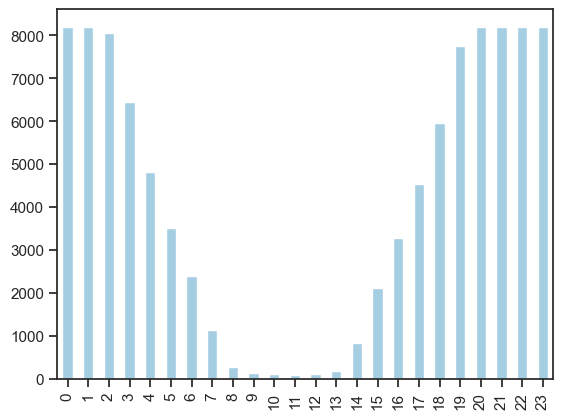

In [17]:
df['hour'][df[target] == 0].value_counts().sort_index().plot(kind='bar');

🔎 **Observations:** The records which has 0 power generation is always during night time dependeing on the season.

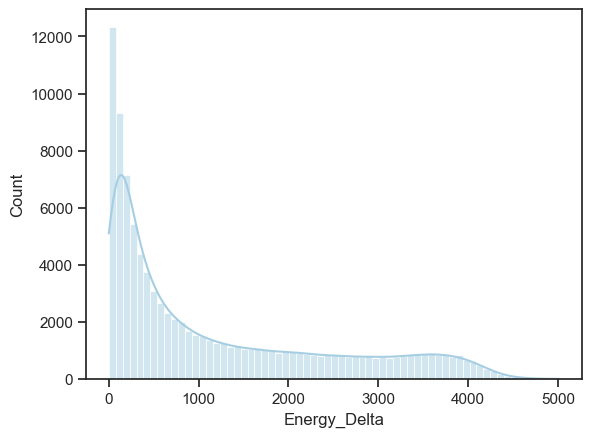

In [18]:
sb.histplot(data=df[df[target]!=0], x=target, kde=True);

🔎 **Observations:** The power generation wihtout the 0 records has a left skewed distribution.

In [19]:
features = df.columns.tolist()
features.remove(target)
features

['Time',
 'GHI',
 'temp',
 'pressure',
 'humidity',
 'wind_speed',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'isSun',
 'sunlightTime',
 'dayLength',
 'SunlightTime/daylength',
 'weather_type',
 'hour',
 'month']

In [20]:
df['isSun'] = df['isSun'].astype('object')
df['weather_type'] = df['weather_type'].astype('object')
df['hour'] = df['hour'].astype('object')
df['month'] = df['month'].astype('object')

In [21]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 5 ['Time', 'isSun', 'weather_type', 'hour', 'month']
Numeric columns: 12 ['Energy_Delta', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength']


In [22]:
df[df[target]!=0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95926 entries, 32 to 196774
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    95926 non-null  object 
 1   Energy_Delta            95926 non-null  int64  
 2   GHI                     95926 non-null  float64
 3   temp                    95926 non-null  float64
 4   pressure                95926 non-null  int64  
 5   humidity                95926 non-null  int64  
 6   wind_speed              95926 non-null  float64
 7   rain_1h                 95926 non-null  float64
 8   snow_1h                 95926 non-null  float64
 9   clouds_all              95926 non-null  int64  
 10  isSun                   95926 non-null  object 
 11  sunlightTime            95926 non-null  int64  
 12  dayLength               95926 non-null  int64  
 13  SunlightTime/daylength  95926 non-null  float64
 14  weather_type            95926 non-nu

## 4.1. Univairate Analysis

### 4.1.1. Categorical Columns

In [23]:
# Function to create labeled barplots for categorical features
def plot_counts(data, features, hue=None):
    
    """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - features <list>: List of categorical columns in dataframe to be visualized.
    - hue <string>: Name of the hue.
    """
    
    # number of columns of the subplots
    n_cols = 2 
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(features)/n_cols)) 

    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sb.countplot(
            data = data,
            x = feature,
            palette = 'Paired',
            hue = hue,
            ax = axes[i]
        )
        # Display count of each level of the category
        for p in axes[i].patches:
            label = p.get_height()
            x = p.get_x() + p.get_width() / 2 # Width of the plot
            y = p.get_height() # Height of the plot
            
            rotation = 0
            if hue is not None:
                rotation = 30  # Rotate annotations by 30 degrees if hue is not None

            axes[i].annotate(
                '{:.0f}'.format(label),
                (x, y),
                ha = 'center',
                va = 'center',
                size = 12,
                xytext = (0, 5),
                textcoords = 'offset points',
                rotation = rotation
            )
            
        axes[i].set(ylabel='Count', title=feature, xlabel='')
        axes[i].tick_params(axis='x', rotation=30)

    # If the number of features is odd, remove the empty subplot
    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

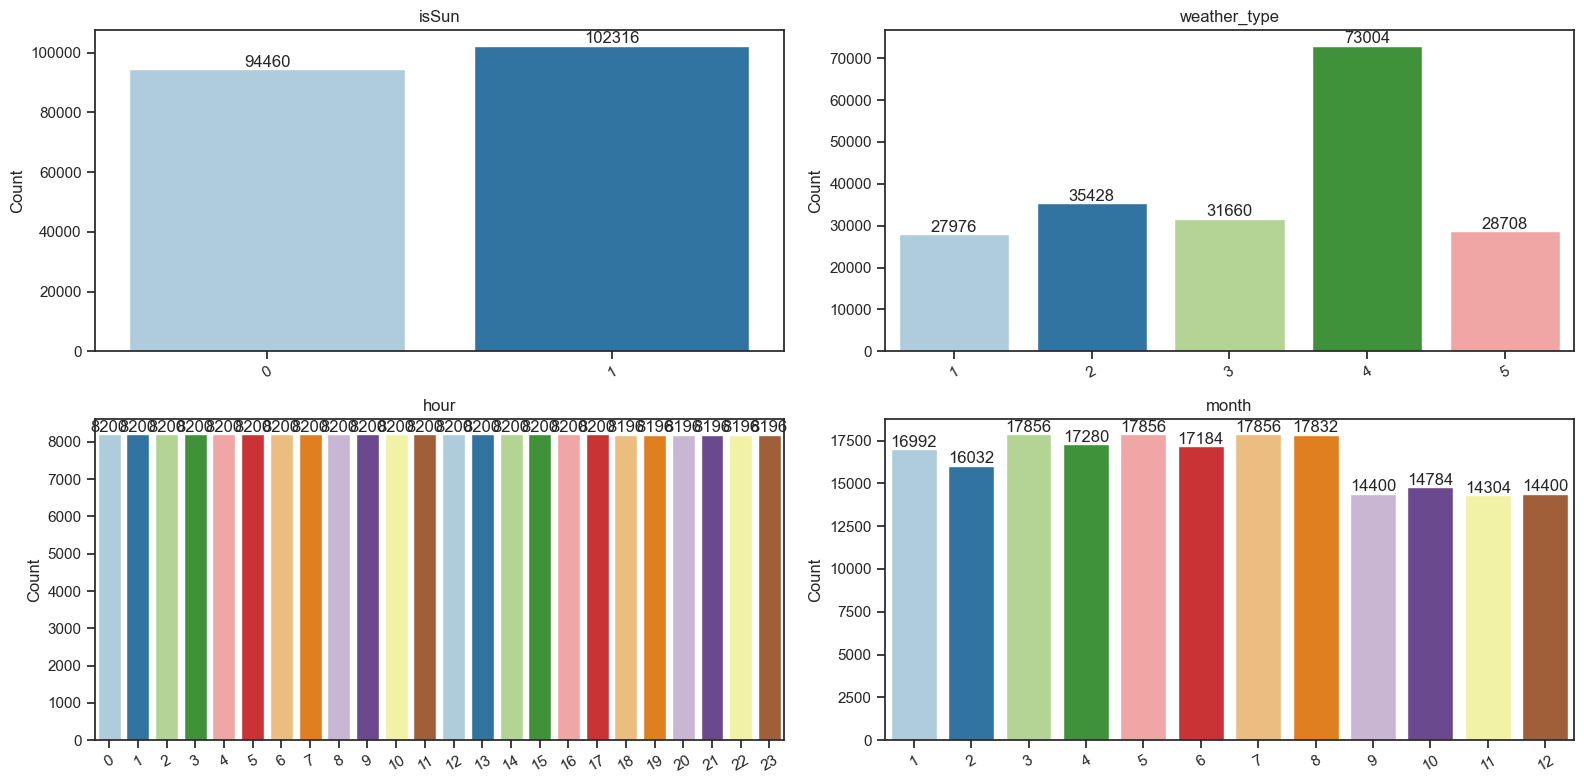

In [24]:
# Do not plot the time
plot_counts(df, cat_cols[1:])

### 4.1.2. Numeric Column

In [25]:
def dist_plot(data, feature_list):
    # number of columns of the subplots
    n_cols = 2 
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(feature_list)/n_cols)) 

    # Create figure
    fig = plt.figure(figsize=(16, 4*n_rows))
    outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

    for i in range(len(feature_list)):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], 
                                                 wspace=0.1, hspace=0.1, height_ratios=(0.15, 0.85))

        ax_box = plt.Subplot(fig, inner[0])
        sb.boxplot(data=data, x=feature_list[i], color='lightblue', ax=ax_box)
        ax_box.set_xlabel('')
        fig.add_subplot(ax_box)

        mean_value = data[feature_list[i]].mean()
        median_value = data[feature_list[i]].median()
        ax_hist = plt.Subplot(fig, inner[1])
        sb.histplot(data=data, x=feature_list[i], kde=True, ax=ax_hist)
        ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
        ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
        # Add a legend
        ax_hist.legend(loc='lower right', fontsize=10)

        # Calculate skewness and kurtosis
        skewness = data[feature_list[i]].skew()
        kurt = data[feature_list[i]].kurt()
        if skewness < 0:
            x=0.25
        else:
            x=0.95
        # Add skewness and kurtosis as text on the histogram plot
        ax_hist.text(x, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                         transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
                    fontsize=10)
        fig.add_subplot(ax_hist)

    plt.tight_layout()
    plt.show(block=False)

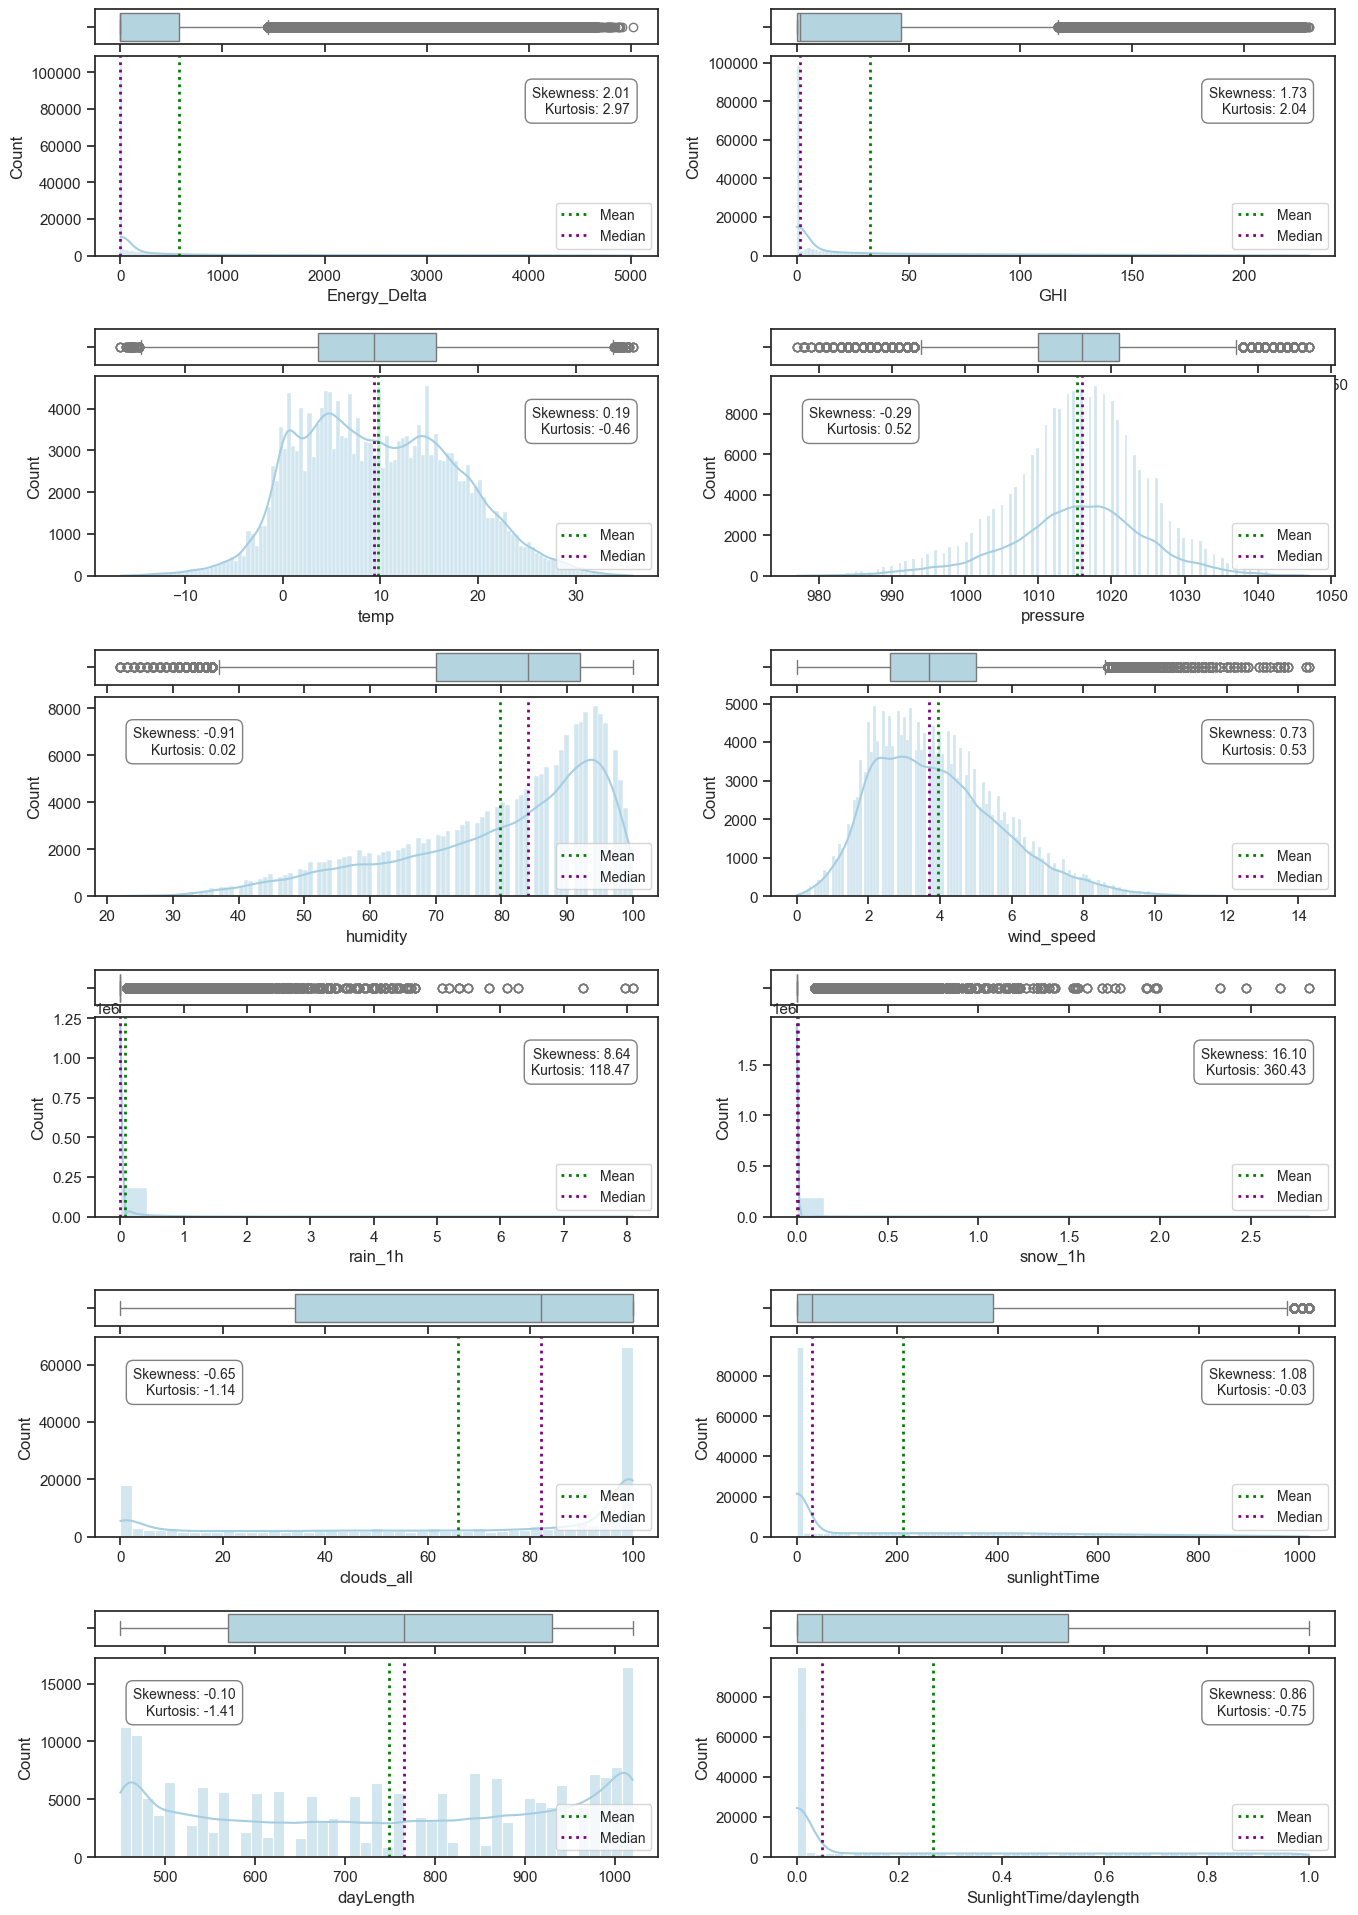

In [26]:
dist_plot(df, num_cols)

🔎 **Observations:**

## 4.2. Bi-variate Analysis

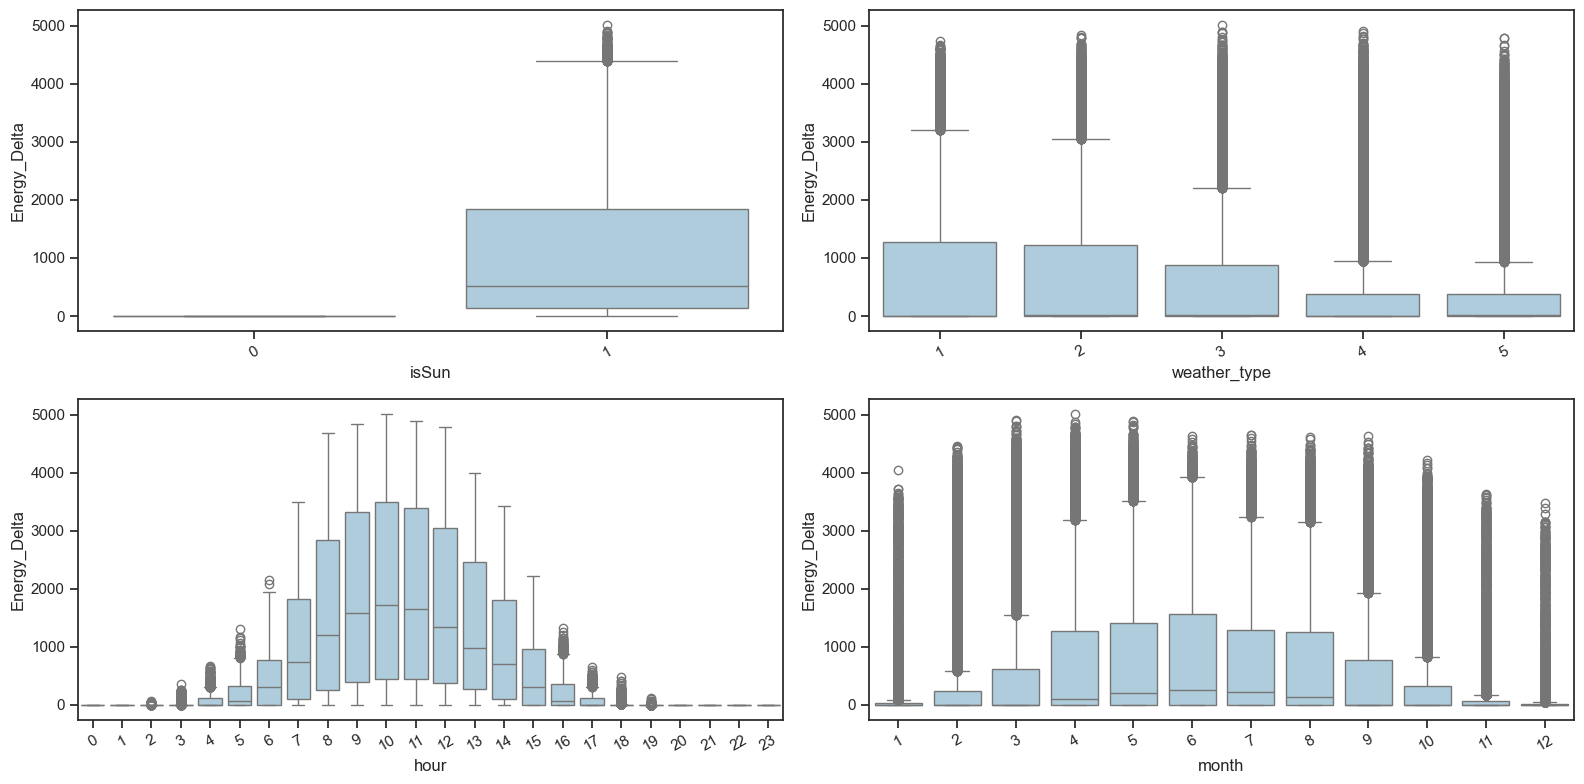

In [27]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(cat_cols[1:])/n_cols)) 

# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()
    
for i, feature in enumerate(cat_cols[1:]):
    sb.boxplot(data=df, x=feature, y=target, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=30)
# If the number of features is odd, remove the empty subplot
if len(cat_cols[1:]) % 2 != 0:
    fig.delaxes(ax[-1])
    
plt.tight_layout()
plt.show(block=False)

🔎 **Observations:**

- It looks like isSun represrens the day light. If it's 0, then there is no energy production.
- Energy_Delta has high correlation with hour, month and weather_type

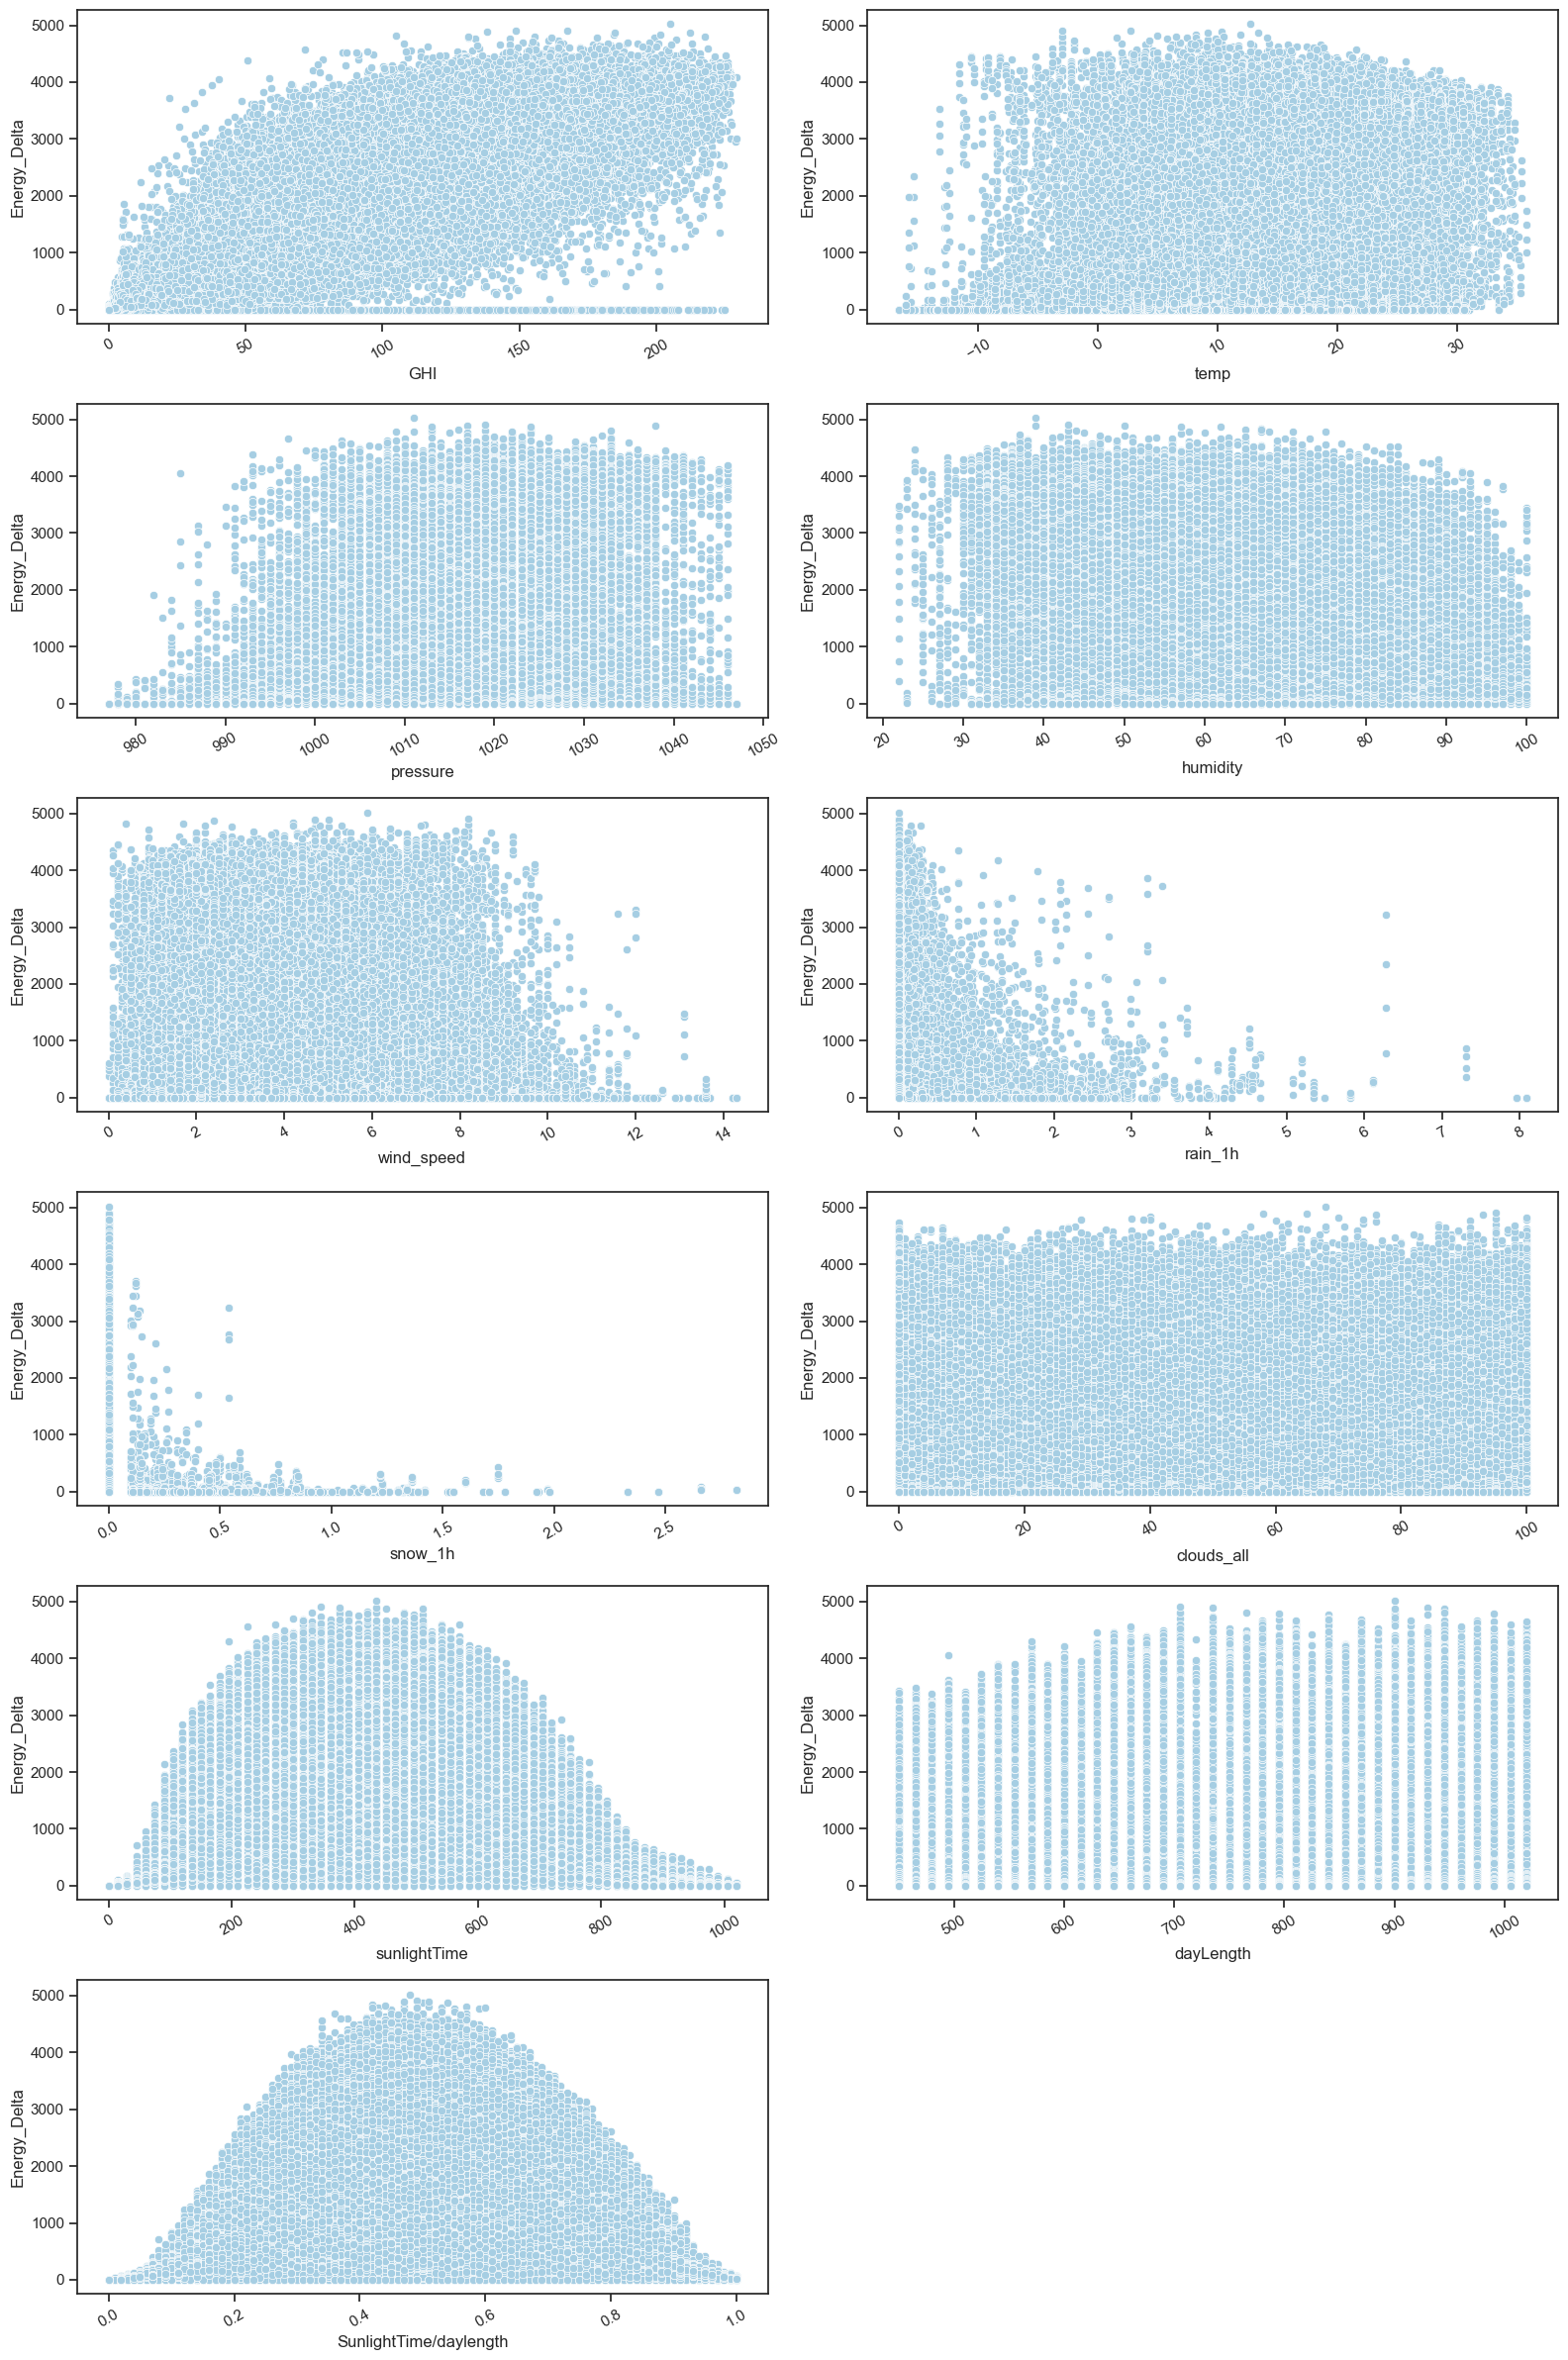

In [28]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(num_cols[1:])/n_cols)) 

# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()
    
for i, feature in enumerate(num_cols[1:]):
    sb.scatterplot(data=df, x=feature, y=target, ax=ax[i], palette='flare')
    ax[i].tick_params(axis='x', rotation=30)
# If the number of features is odd, remove the empty subplot
if len(num_cols[1:]) % 2 != 0:
    fig.delaxes(ax[-1])
    
plt.tight_layout()
plt.show(block=False)

## 4.3. Multi-variate Analysis

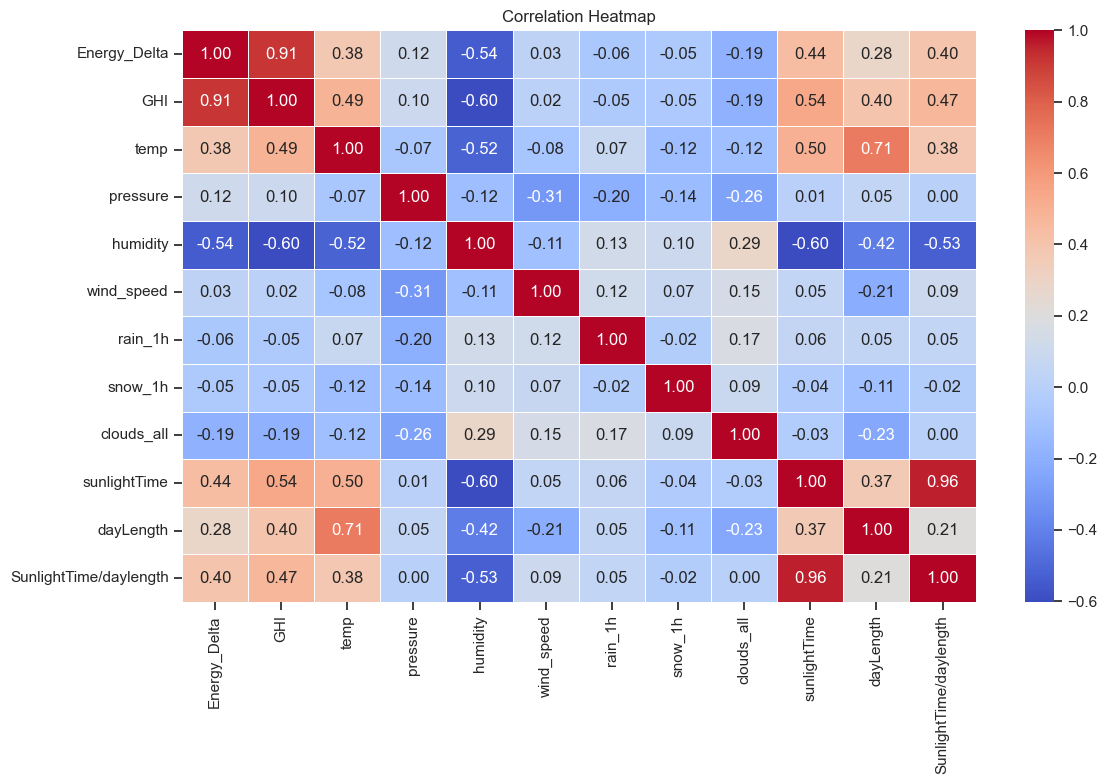

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.heatmap(df.drop(cat_cols, axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

🔎 **Observations:**

> Global horizontal irradiance (GHI) is the total irradiance from the Sun on a horizontal surface on Earth. It is the sum of direct irradiance (after accounting for the solar zenith angle of the Sun z) and diffuse horizontal irradiance [Wiki](https://en.wikipedia.org/wiki/Solar_irradiance).

It's a value that we can't measure without extra equipment. Considering the problem statement which we are trying to predict the energy production based on the weather conditions, we'll drop this feature.

Additionally, SunlightTime/daylength feature is division of sunlightTime to dayLength. It can be easily seen that this features provides better relation with the target then other features individually. That's why we'll remove SunlightTime and dayLength features. By this, we'll et rid off the high correlation between the dayLenght and temp which may cause multi-colinearity.

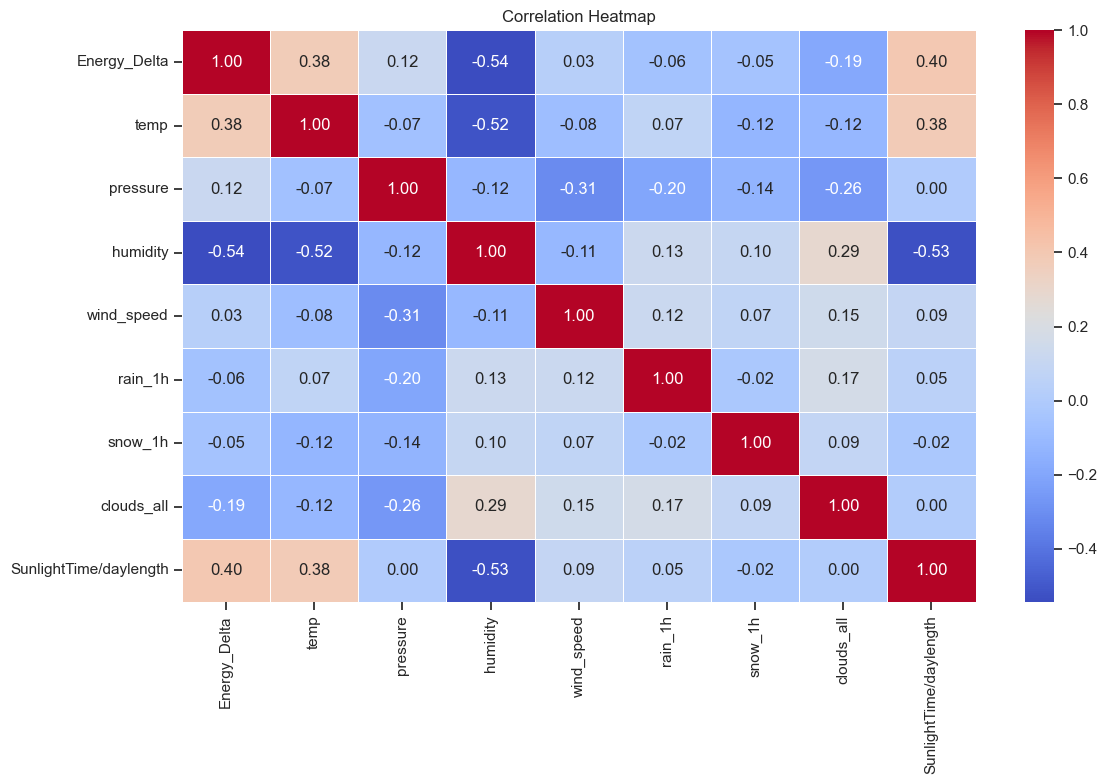

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.heatmap(df.drop(cat_cols + ['GHI', 'sunlightTime', 'dayLength'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 🧹 5. Data Preparation

- Remove Enegry_Delta records with 0 values
- Remove isSun as it it's 0 if Energy_Delta is 0
- Remove GHI, sunlightTime, dayLength features because of the reason mentioned above. Additionally remove Time too.
- Transform categorical and numeric values

## 5.1. Cleaning 0 Records

In [31]:
df_non_zero = df[df[target]!=0]
df_non_zero.reset_index(drop=True, inplace=True)
df_non_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95926 entries, 0 to 95925
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    95926 non-null  object 
 1   Energy_Delta            95926 non-null  int64  
 2   GHI                     95926 non-null  float64
 3   temp                    95926 non-null  float64
 4   pressure                95926 non-null  int64  
 5   humidity                95926 non-null  int64  
 6   wind_speed              95926 non-null  float64
 7   rain_1h                 95926 non-null  float64
 8   snow_1h                 95926 non-null  float64
 9   clouds_all              95926 non-null  int64  
 10  isSun                   95926 non-null  object 
 11  sunlightTime            95926 non-null  int64  
 12  dayLength               95926 non-null  int64  
 13  SunlightTime/daylength  95926 non-null  float64
 14  weather_type            95926 non-null

## 5.2. Dropping Columns

In [32]:
df_non_zero.drop(['Time', 'GHI', 'sunlightTime', 'dayLength', 'isSun'], axis=1, inplace=True)
df_non_zero.info()
df_non_zero.to_csv('./Data/Processed/df_non_zero.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95926 entries, 0 to 95925
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Energy_Delta            95926 non-null  int64  
 1   temp                    95926 non-null  float64
 2   pressure                95926 non-null  int64  
 3   humidity                95926 non-null  int64  
 4   wind_speed              95926 non-null  float64
 5   rain_1h                 95926 non-null  float64
 6   snow_1h                 95926 non-null  float64
 7   clouds_all              95926 non-null  int64  
 8   SunlightTime/daylength  95926 non-null  float64
 9   weather_type            95926 non-null  object 
 10  hour                    95926 non-null  object 
 11  month                   95926 non-null  object 
dtypes: float64(5), int64(4), object(3)
memory usage: 8.8+ MB


In [33]:
# Checking if there are any single value columns after removing 0 value records
df_non_zero.nunique()

Energy_Delta              4555
temp                       476
pressure                    69
humidity                    79
wind_speed                 121
rain_1h                    288
snow_1h                     89
clouds_all                 101
SunlightTime/daylength     100
weather_type                 5
hour                        18
month                       12
dtype: int64

In [34]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df_non_zero.columns:
    if pd.api.types.is_numeric_dtype(df_non_zero[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df_non_zero[column]):
        cat_cols.append(column)
        
print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 3 ['weather_type', 'hour', 'month']
Numeric columns: 9 ['Energy_Delta', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'SunlightTime/daylength']


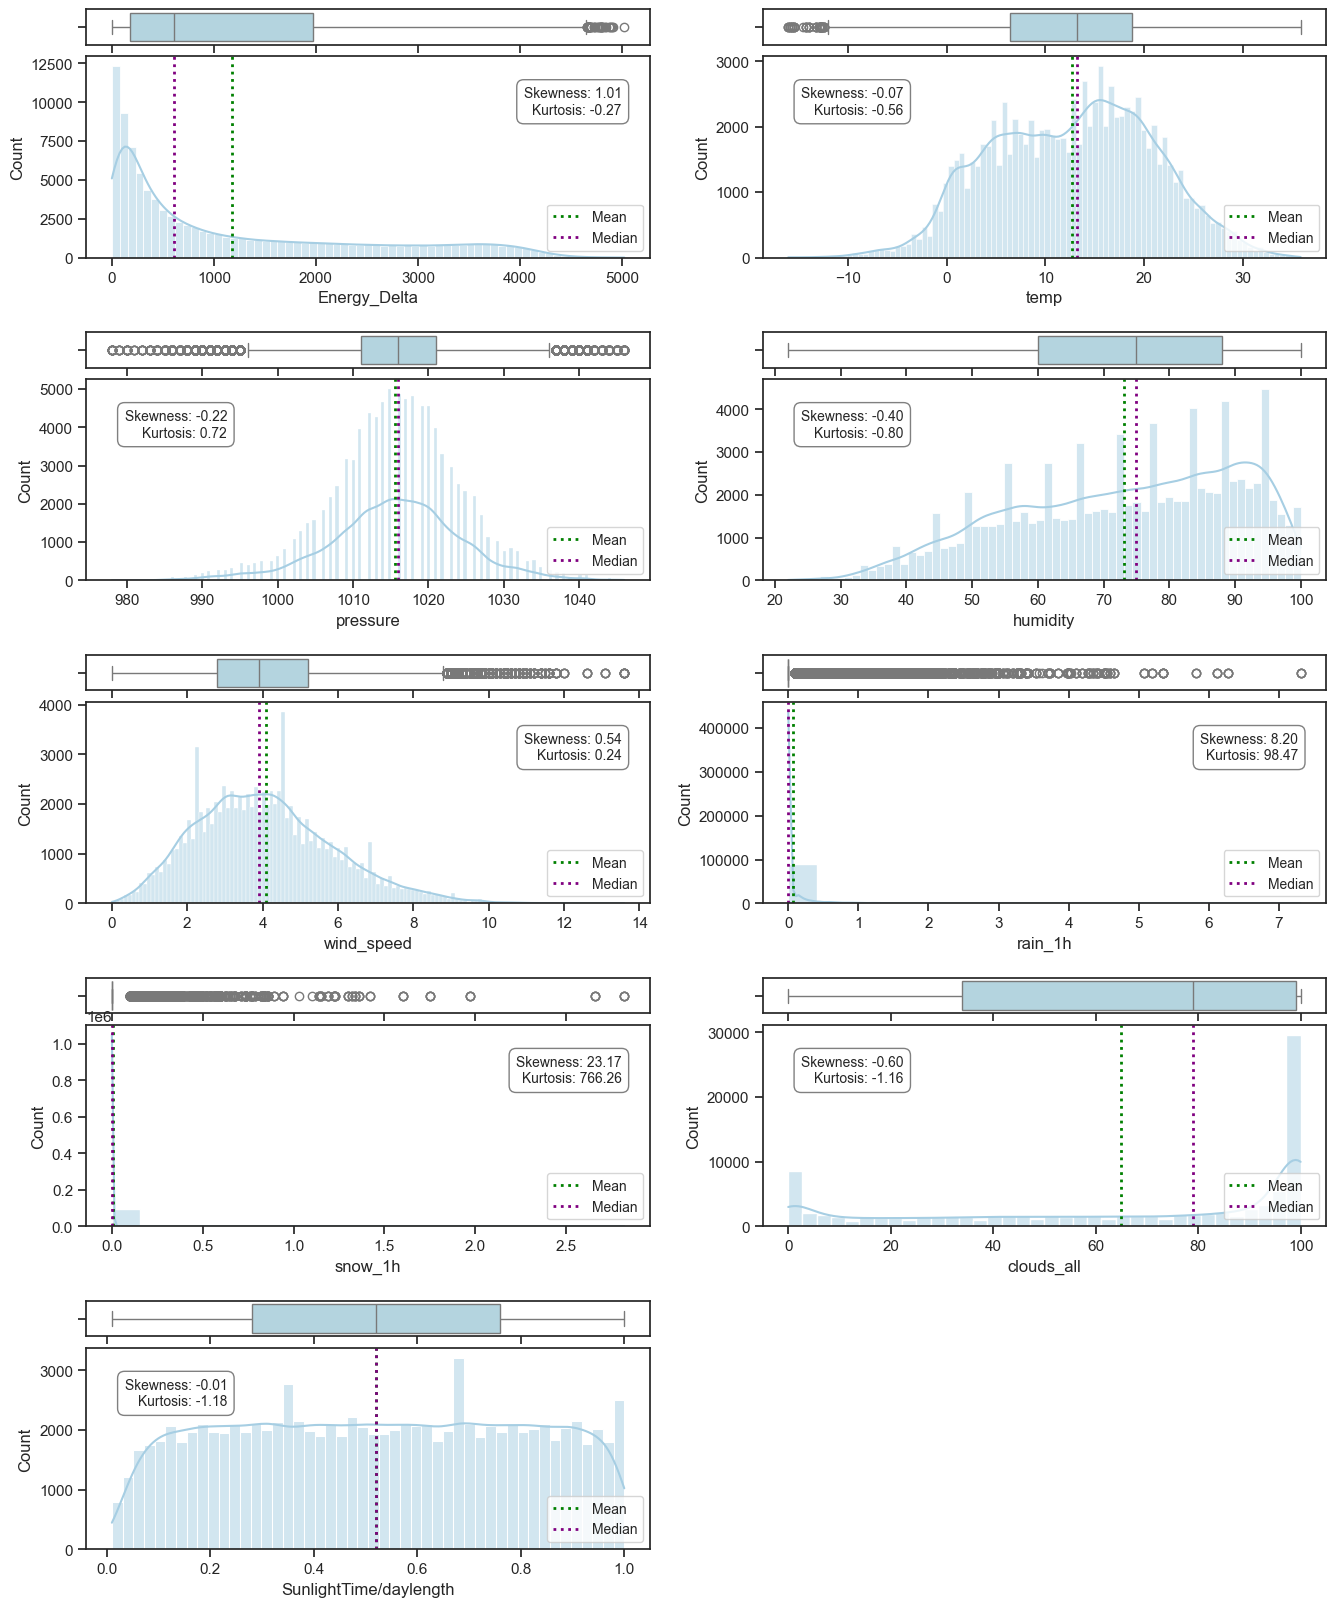

In [35]:
# Checking the distributions after removing 0 value records
dist_plot(df_non_zero, num_cols)

In [36]:
df_non_zero[df_non_zero['rain_1h']!=0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13694 entries, 39 to 95898
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Energy_Delta            13694 non-null  int64  
 1   temp                    13694 non-null  float64
 2   pressure                13694 non-null  int64  
 3   humidity                13694 non-null  int64  
 4   wind_speed              13694 non-null  float64
 5   rain_1h                 13694 non-null  float64
 6   snow_1h                 13694 non-null  float64
 7   clouds_all              13694 non-null  int64  
 8   SunlightTime/daylength  13694 non-null  float64
 9   weather_type            13694 non-null  object 
 10  hour                    13694 non-null  object 
 11  month                   13694 non-null  object 
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


In [37]:
df_non_zero['rain_1h'][df_non_zero['rain_1h']>0].describe()

count   13694.000
mean        0.515
std         0.644
min         0.100
25%         0.160
50%         0.270
75%         0.600
max         7.310
Name: rain_1h, dtype: float64

In [38]:
df_non_zero['rain_1h'][df_non_zero['rain_1h']>0].sample(20)

39213   1.360
74097   0.110
47190   0.110
7091    0.500
35712   0.580
13383   0.160
75853   2.810
87063   0.140
86009   0.180
2024    0.120
5637    2.080
51912   0.160
72268   0.560
44048   0.560
49403   0.850
11679   0.280
79426   0.430
89025   0.590
47401   1.320
62893   1.310
Name: rain_1h, dtype: float64

🔎 **Observations:** We can treat the rain_1h and snow_1h as categorical features and group values in certain values as it has a lot of 0 values. However, let's first see the performance as it is, then wrangle if needed.

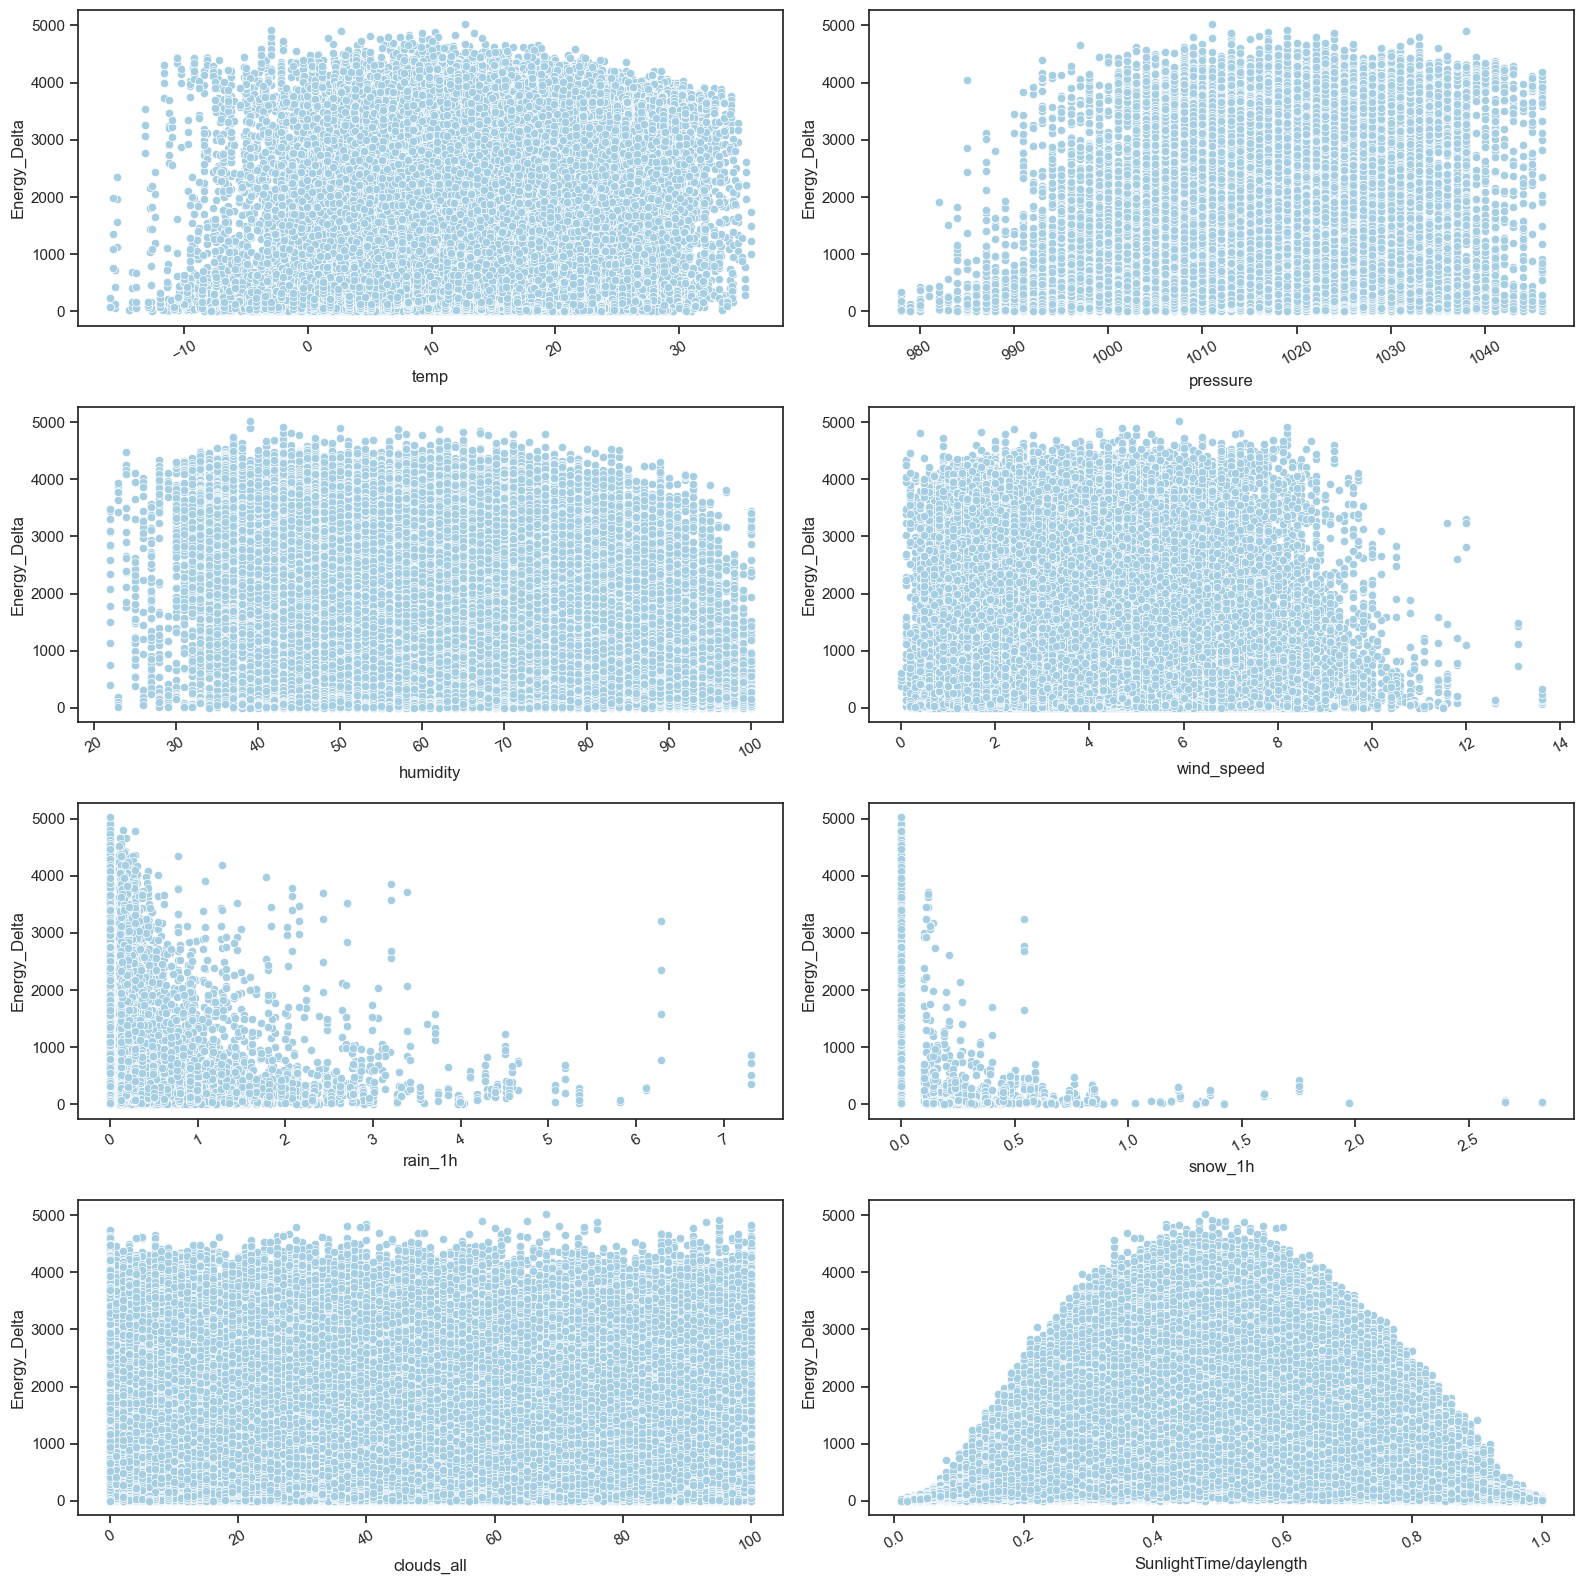

In [39]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(num_cols[1:])/n_cols)) 

# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()
    
for i, feature in enumerate(num_cols[1:]):
    sb.scatterplot(data=df_non_zero, x=feature, y=target, ax=ax[i], palette='flare')
    ax[i].tick_params(axis='x', rotation=30)
# If the number of features is odd, remove the empty subplot
if len(num_cols[1:]) % 2 != 0:
    fig.delaxes(ax[-1])
    
plt.tight_layout()
plt.show(block=False)

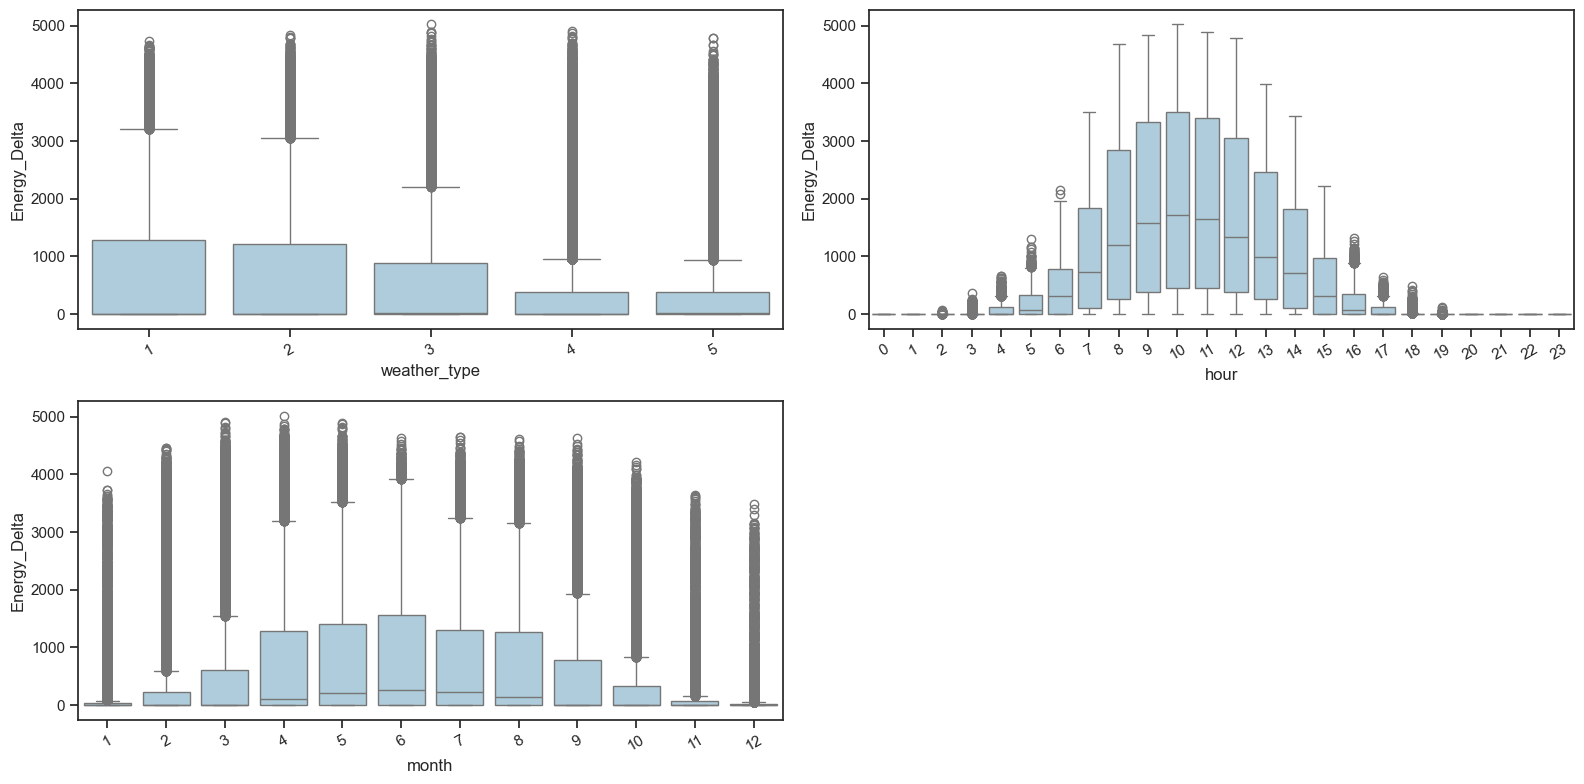

In [40]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(cat_cols)/n_cols)) 

# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()
    
for i, feature in enumerate(cat_cols):
    sb.boxplot(data=df, x=feature, y=target, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=30)
# If the number of features is odd, remove the empty subplot
if len(cat_cols) % 2 != 0:
    fig.delaxes(ax[-1])
    
plt.tight_layout()
plt.show(block=False)

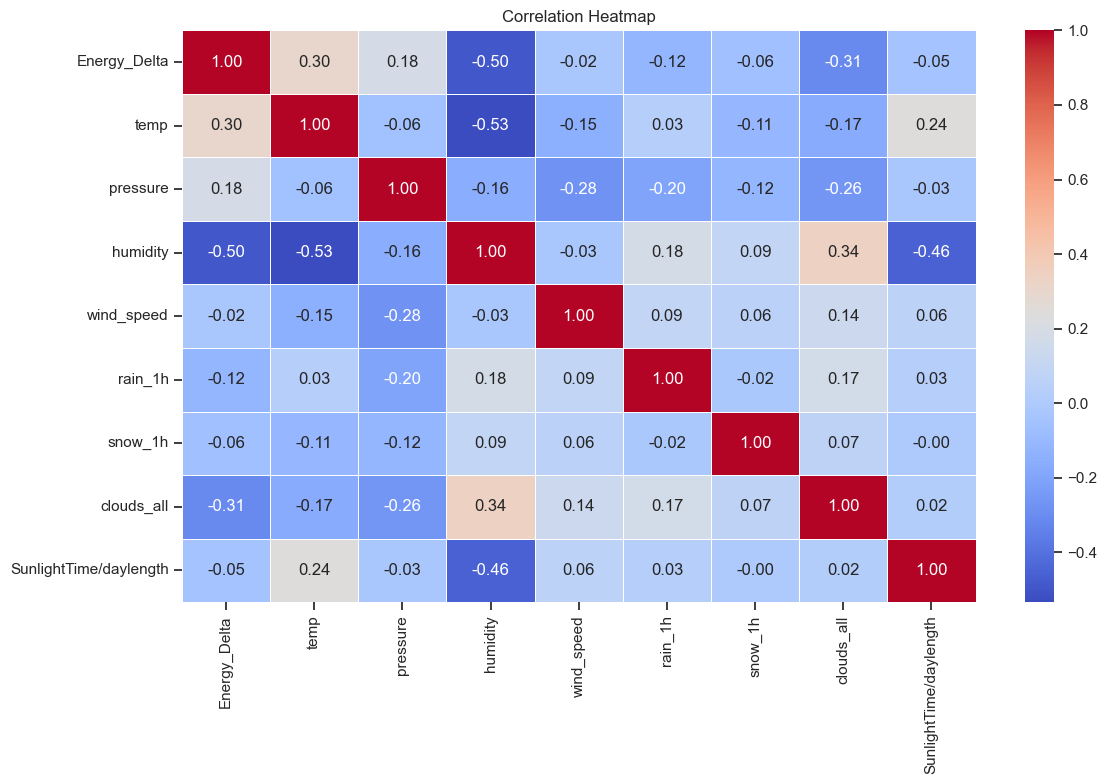

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.heatmap(df_non_zero.drop(cat_cols, axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()